In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [3]:
# Paths to training and validation directories
base_dir = "C:\\Users\\LOQ\\OneDrive\\Documents\\Bangkit_Capstone\\Data"
train_dir = f'{base_dir}/train'
val_dir = f'{base_dir}/val'

# Image data generators for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=16,
    class_mode='categorical',
    color_mode='grayscale'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),
    batch_size=16,
    class_mode='categorical',
    color_mode='grayscale'
)

# Build the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 1), kernel_regularizer=l2(0.001), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(1028, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  
])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        training_accuracy = logs.get('accuracy')
        validation_accuracy = logs.get('val_accuracy')
        if training_accuracy is not None and validation_accuracy is not None:
            if training_accuracy > 0.9 and validation_accuracy > 0.9:
                print("\nTarget akurasi telah tercapai, menghentikan pelatihan!")
                self.model.stop_training = True

callback = myCallback()

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    #optimizer=SGD(learning_rate=0.0003, momentum=0.9),

    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=160,
    callbacks=[callback],
    verbose=2
)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Save the model
# model.save('waste_classification_model.h5')


Found 7290 images belonging to 10 classes.
Found 1756 images belonging to 10 classes.


c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/160


c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


455/455 - 74s - 163ms/step - accuracy: 0.1483 - loss: 2.2454 - val_accuracy: 0.1537 - val_loss: 2.1305
Epoch 2/160
455/455 - 0s - 403us/step - accuracy: 0.2500 - loss: 2.0509 - val_accuracy: 0.0833 - val_loss: 2.0140
Epoch 3/160


c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


455/455 - 66s - 145ms/step - accuracy: 0.1824 - loss: 2.1381 - val_accuracy: 0.1950 - val_loss: 2.0859
Epoch 4/160
455/455 - 0s - 440us/step - accuracy: 0.1250 - loss: 2.1426 - val_accuracy: 0.1667 - val_loss: 2.1071
Epoch 5/160
455/455 - 74s - 164ms/step - accuracy: 0.1967 - loss: 2.0862 - val_accuracy: 0.1978 - val_loss: 2.0702
Epoch 6/160
455/455 - 0s - 418us/step - accuracy: 0.0625 - loss: 2.0833 - val_accuracy: 0.0000e+00 - val_loss: 2.2798
Epoch 7/160
455/455 - 74s - 163ms/step - accuracy: 0.2263 - loss: 2.0447 - val_accuracy: 0.2058 - val_loss: 2.0627
Epoch 8/160
455/455 - 0s - 445us/step - accuracy: 0.0000e+00 - loss: 2.5857 - val_accuracy: 0.2500 - val_loss: 2.1752
Epoch 9/160
455/455 - 74s - 163ms/step - accuracy: 0.2674 - loss: 1.9751 - val_accuracy: 0.3108 - val_loss: 1.8886
Epoch 10/160
455/455 - 0s - 425us/step - accuracy: 0.2500 - loss: 1.9673 - val_accuracy: 0.3333 - val_loss: 1.8921
Epoch 11/160
455/455 - 73s - 160ms/step - accuracy: 0.2924 - loss: 1.9299 - val_accurac

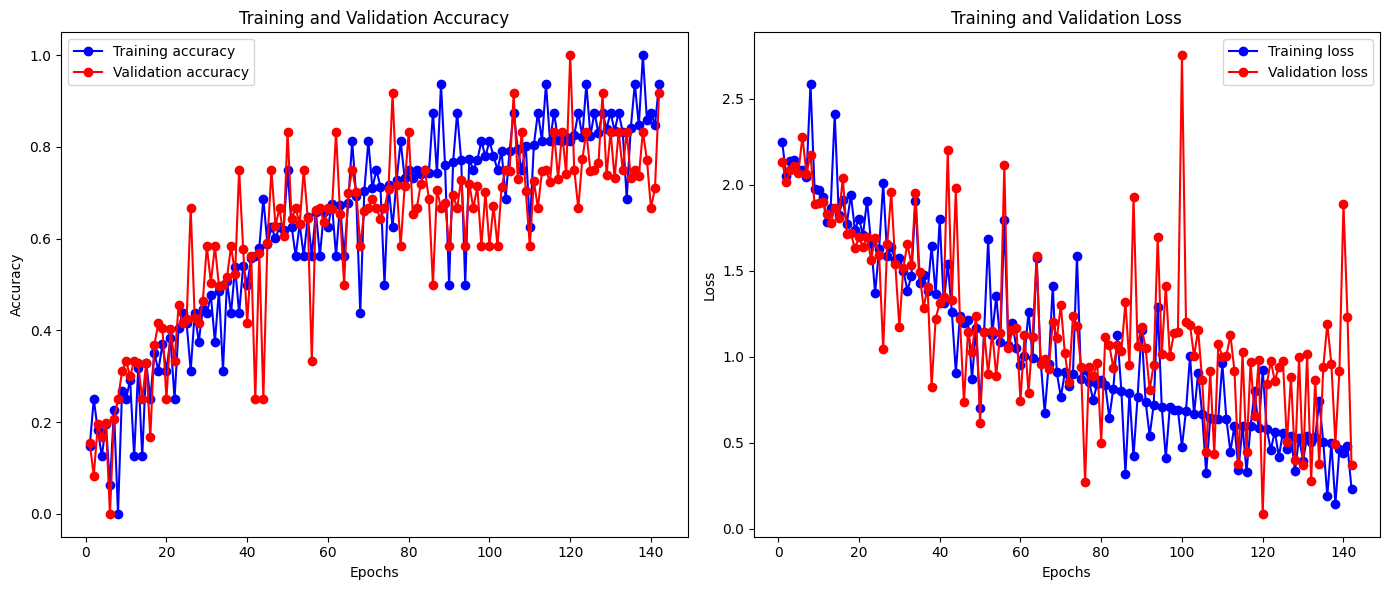

In [4]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Save the model
model.save('waste_classification_model100px_grayscale.h5')

In [6]:
# Contoh jika menggunakan train_generator
class_indices = train_generator.class_indices
print(class_indices)


{'battery': 0, 'cardboard': 1, 'glass': 2, 'medis': 3, 'metal': 4, 'organic': 5, 'paper': 6, 'plastic': 7, 'shoes': 8, 'textile': 9}


In [7]:
# import numpy as np
# import tensorflow as tf
# # 1. Memuat Model yang Telah Dilatih
# model_path = "C:\\Users\\LOQ\\OneDrive\\Documents\\Bangkit_Capstone\\waste_classification_model100px.h5"
# model = tf.keras.models.load_model(model_path)

# # 2. Fungsi untuk Memuat dan Memproses Gambar
# def load_and_preprocess_image(image_path, target_size=(100, 100)):
#     # Memuat gambar dalam warna (default)
#     img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
#     # Mengubah gambar menjadi array numpy
#     img_array = tf.keras.preprocessing.image.img_to_array(img)
#     # Menambahkan dimensi tambahan karena model membutuhkan bentuk (batch_size, width, height, channels)
#     img_array = np.expand_dims(img_array, axis=0)
#     # Normalisasi nilai piksel menjadi rentang [0, 1]
#     img_array = img_array / 255.0
#     return img_array

# # 3. Melakukan Prediksi dengan Model
# def predict_image(image_path, model, class_mapping):
#     img_array = load_and_preprocess_image(image_path)
#     # Melakukan prediksi
#     predictions = model.predict(img_array)
#     # Mendapatkan indeks kelas prediksi
#     predicted_class = np.argmax(predictions)
#     # Mendapatkan label untuk kelas yang diprediksi
#     predicted_label = class_mapping[predicted_class]
#     return predicted_label

# # Dictionary yang memetakan nomor kelas ke label yang sesuai
# class_mapping = {
#     0: 'battery',
#     1: 'cardboard',
#     2: 'glass',
#     3: 'medis',
#     4: 'metal',
#     5: 'organic',
#     6: 'paper',
#     7: 'plastic',
#     8: 'shoes',
#     9: 'textile',
# }

# # 4. Path ke gambar yang ingin diprediksi
# #image_path = "C:\\Users\\LOQ\\OneDrive\\Documents\\Bangkit_Capstone\\archive (1)\\realwaste-main\\RealWaste\\Glass\\Glass_372.jpg"
# image_path = "C:\\Users\\LOQ\\OneDrive\\Documents\\Bangkit_Capstone\\archive (1)\\realwaste-main\\RealWaste\\Glass\\Glass_1.jpg"
# # Melakukan prediksi dan menampilkan hasilnya
# predicted_label = predict_image(image_path, model, class_mapping)
# print(f"Prediksi kelas: {predicted_label}")